### Imports

In [167]:
from mlp import train, predict, Dense, Activation, predict_with_layer_value
from activation_functions import Sigmoid
from mse import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix
from data.font import fontDict
from main import visualize_results, plot_latent_space
from utils import get_config_params
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Parámetros de configuración

In [13]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation, hidden_layers, latent_space = get_config_params('./linear_ae.json')

In [9]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
X = np.reshape(bitmapList,(len(bitmapList), 35, 1))

In [141]:
learning_rate = 0.001

# El espacio latente es la salida de la "capa 6"
autoencoder = [
    Dense(35, 20, optimizer_type="ADAM", learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 10, optimizer_type="ADAM", learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 2, optimizer_type="ADAM", learning_rate=learning_rate),
    Sigmoid(),
    Dense(2, 10, optimizer_type="ADAM", learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 20, optimizer_type="ADAM", learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 35, optimizer_type="ADAM", learning_rate=learning_rate),
    Sigmoid(),
]
train(autoencoder, mse, mse_derivative, X, X, epochs=5000, verbose=False)




In [176]:
output, latent_space = predict_with_layer_value(autoencoder, X[1], 6)
print(len(latent_space))
print(latent_space)

2
[[0.21023647]
 [0.00071459]]


In [211]:
def plot_bitmap_matrix(original, predicted, character):
    # Crear un heatmap con imshow de matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(3, 2)) # 1 fila, 2 columnas

    # Crear heatmaps para cada par de matrices
    axs[0].imshow(original, cmap='binary', interpolation='none')
    axs[0].set_title('Original ' + character)
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    axs[1].imshow(predicted, cmap='binary', interpolation='none')
    axs[1].set_title('Predicted ' + character)
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    

    # Ajustar el diseño del gráfico
    plt.tight_layout()

    # Mostrar el gráfico con ambos pares de matrices
    plt.show()

In [191]:
def plot_latent_spaces(latent_space, characters):
    # Convertir la lista de tuplas y etiquetas a un DataFrame de Pandas
    df = pd.DataFrame({'x': [p[0] for p in latent_space], 'y': [p[1] for p in latent_space], 'etiqueta': characters})

    # Graficar los puntos usando Pandas
    ax = df.plot.scatter(x='x', y='y', color='blue', marker='o', s=50)

    # Anotar cada punto con su respectiva etiqueta
    for i, row in df.iterrows():
        ax.annotate(row['etiqueta'], (row['x'], row['y']), textcoords="offset points", xytext=(0,5), ha='center')

    # Configurar etiquetas y título
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_title('Gráfico del Espacio Latente para cada Caracter')

    # Mostrar el gráfico
    plt.show()

['`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'DEL']


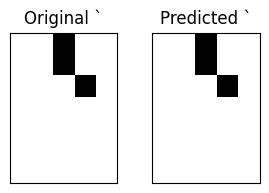

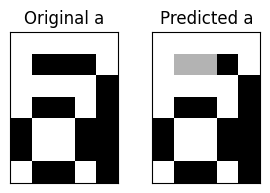

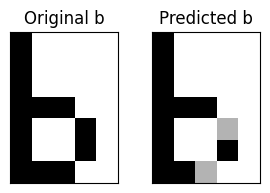

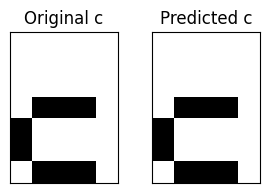

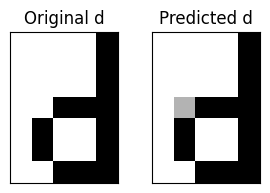

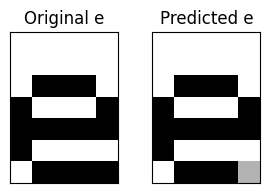

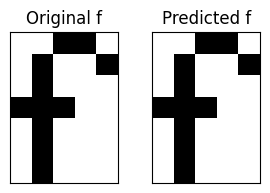

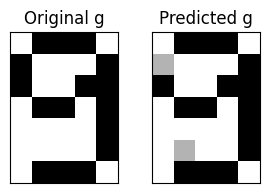

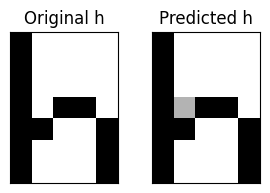

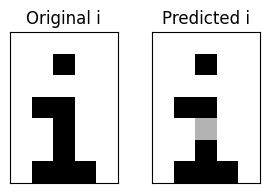

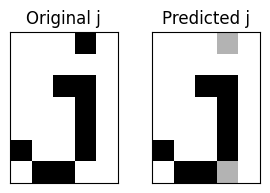

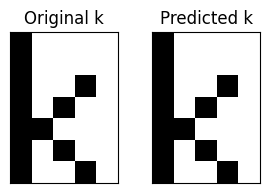

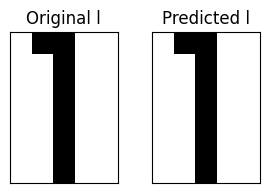

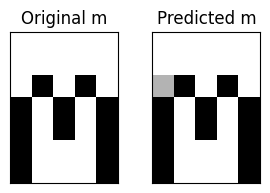

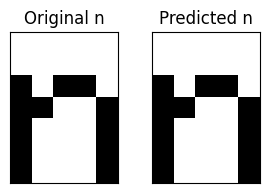

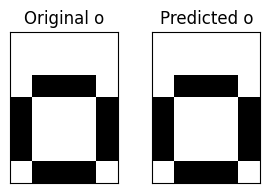

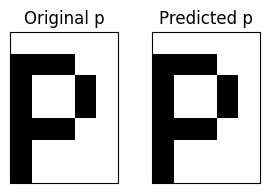

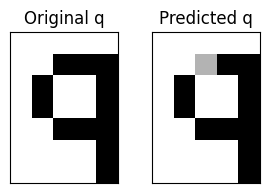

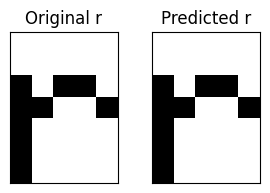

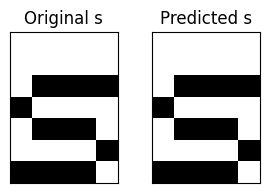

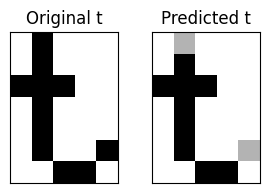

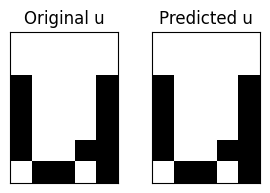

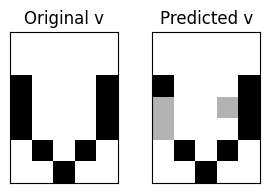

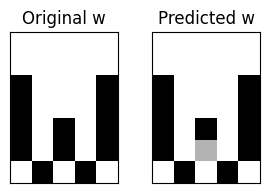

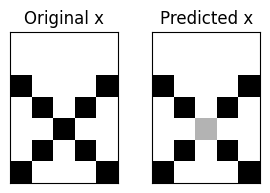

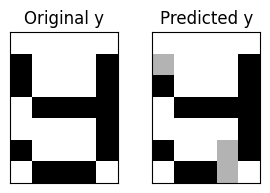

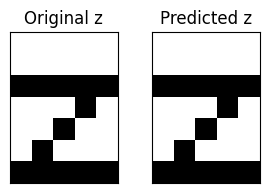

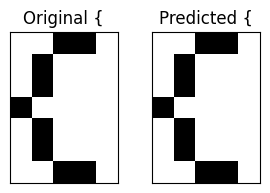

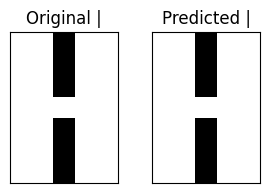

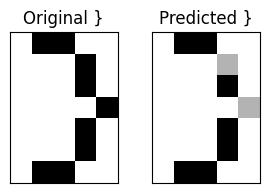

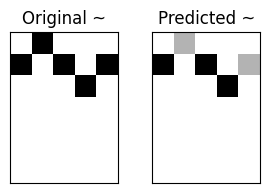

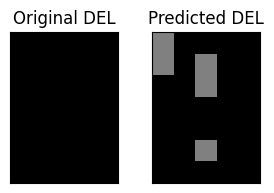

In [212]:
characters = list(bitmapDict.keys())
print(characters)

latent_spaces = []
for c in range(len(characters)):
    input_bitmap = []
    output_bitmap = []

    # X es una lista de listas de -listas con un solo elemento-
    for i in range(len(X[c])):
        input_bitmap.append(X[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)

    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[c], 6)
    latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

    for output in outputs:
        # Para tanh, deberia ser "1 if num[0] > 0 else 0"?
        output_bitmap.append(round(abs(output[0])))
    

    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)

    # Marcamos en gris los pixeles que cambiaron
    for i in range(len(output_bitmap_matrix)):
        for j in range(len(output_bitmap_matrix[i])):
            if output_bitmap_matrix[i][j] != input_bitmap_matrix[i][j]:
                output_bitmap_matrix[i][j] = 0.3
    
    plot_bitmap_matrix(input_bitmap_matrix, output_bitmap_matrix, characters[c])

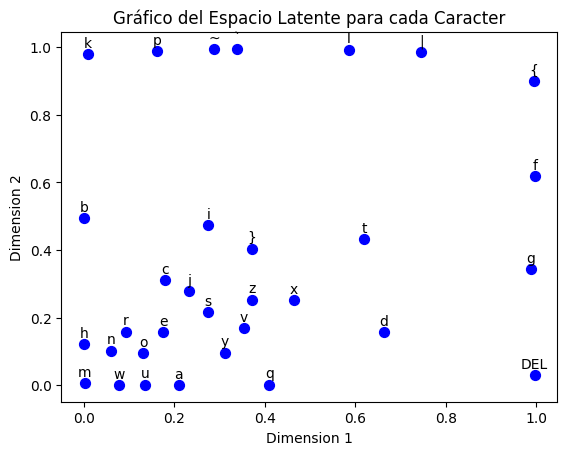

In [193]:
plot_latent_spaces(latent_spaces, characters)